# 🧠 ERD of Single Subject 🖥️
---

### 🤔ERD(Event-Related Desynchronization)란 무엇인가?   

: 특정 작업을 수행할 때 움직임과 관련된 뇌파의 활동이 억제되는 현상   

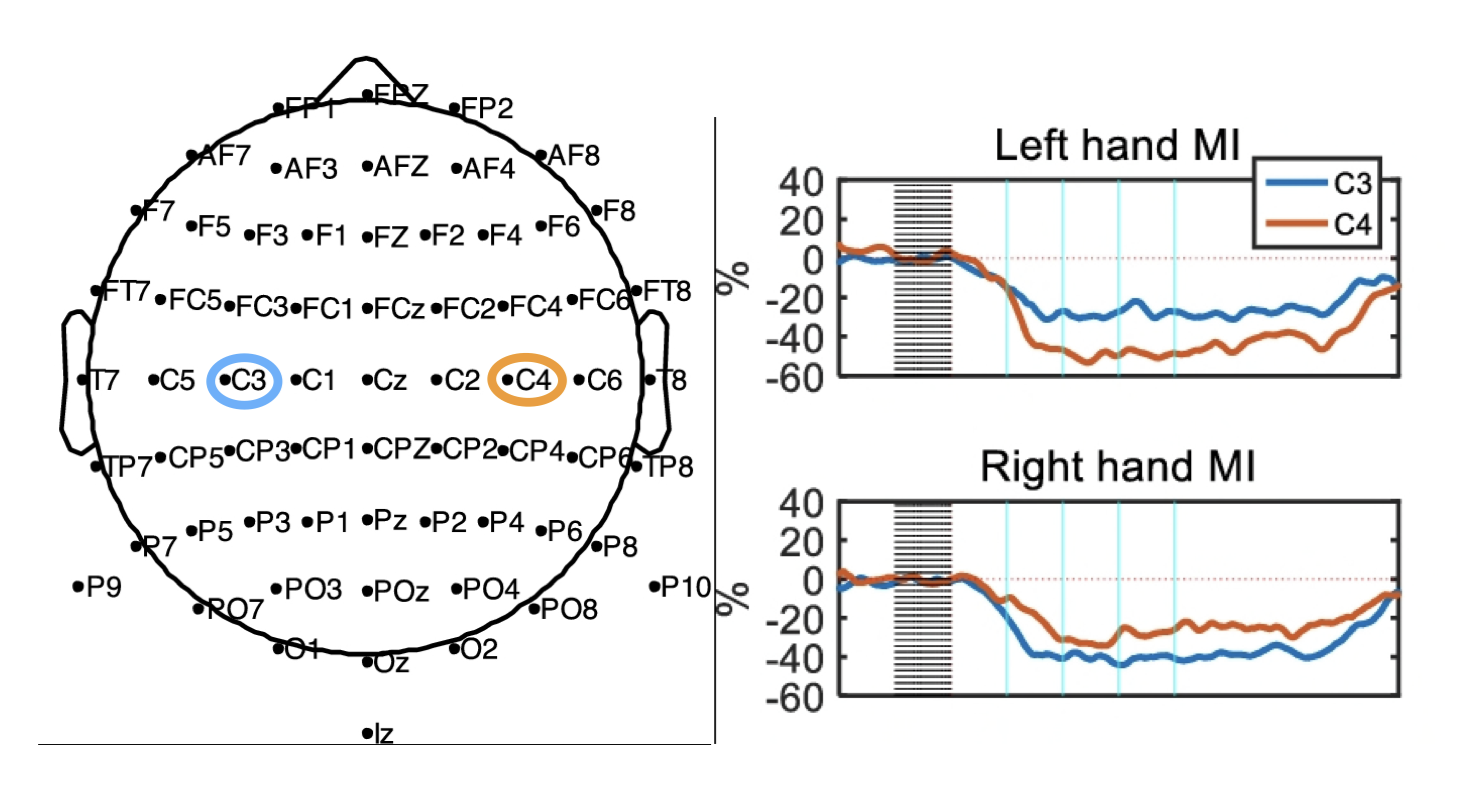

### 👨‍🔬s43
* ```Raw```, ```event```, ```Epoch```, Stim channel을 이해할 수 있다.
* Rereference를 이해할 수 있다.
* Bandpass Filtering을 이해할 수 있다.
* s43의 C3, C4 뇌파를 관찰함으로써 ERD를 이해할 수 있다.
* Hillbert Transform에 대한 대략적인 개념을 알고 사용할 수 있다.

In [ ]:
import mne
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

### 🎒```mat``` file을 ```Raw``` 객체로 변환
* 뇌파 데이터를 ```mne```에서 작업할 수 있도록 ```Raw``` 객체로 변환해야 한다.

In [ ]:
# mat file 불러오기
mat = # Fill the blank

In [ ]:
# mat 구조 살펴보기
for i in mat:
    print(i)
print()

In [ ]:
fields = list(mat['eeg'][0].dtype.fields.keys())
print("fields:", fields)

* ```Raw``` 객체를 생성하기 위해서는 ```info``` 객체가 필요
* ```info``` 객체를 생성하기 위한 매개변수 준비 ([참고](https://github.com/NeuroTechX/moabb/blob/develop/moabb/datasets/gigadb.py#L19-L134))

In [ ]:
# [참고]에서 매개변수 정보 가져오기

**Stim channel이란?**
* 통상적으로 알고 있는 채널들과는 달리 EEG, EMG에서 신호를 받는 채널이 아니다.
* 대신, ```event```를 기록해놓는 채널
* 그러므로 Stim channel을 통해 ```event```가 언제 발생했는 지 알 수 있다.

-> [해당 논문](https://academic.oup.com/gigascience/article/6/7/gix034/3796323)에서는 ```imagery_event```와  ```movement_event```가 Stim channel 역할을 한다.

또한 [논문](https://academic.oup.com/gigascience/article/6/7/gix034/3796323)을 통해 ```sfreq``` 매개변수는 ```srate```임을 알 수 있다.

In [ ]:
srate = # Fill the blank

# info 생성
info = mne.create_info(ch_names=ch_names, sfreq=srate, ch_types=ch_types)

# Stim channel 붙이기
left = np.vstack(# Fill the blank)
right = # Fill the blank

In [ ]:
# Raw 생성
lr = # Fill the blank
rr = # Fill the blank
raw = [lr, rr]

In [ ]:
LEFT = 0
RIGHT = 1

### 🔖Rereference
* 여러 전극을 통해 뇌 신호를 측정할 때 두피, 머리카락, 외부 환경의 영향을 받을 수 있다.
* 이러한 외부 영향을 최소화함으로 뇌 신호를 신뢰할 수 있는 형태로 변환하는 작업을 **Rereference** 라고 한다.
* 대표적으로, **Common Average Reference(CAR)** 이 있다.

In [ ]:
# set_eeg_reference

### ✂️-2s ~ 5s Epoching

```Raw``` 객체를 살펴보자.

In [ ]:
print("Raw의 길이:", len(raw[LEFT]))
print("초로 환산하면:", len(raw[LEFT]) / srate)
print("n_imagery_trials로 나누면:", len(raw[LEFT]) / srate / mat['eeg'][0]['n_imagery_trials'][0][0])

논문의 [Experimental paradigm](https://academic.oup.com/view-large/figure/120211332/gix034fig2.jpeg)에 따라 한 번의 실험은 7초이고, 총 100번의 실험이 하나의 배열에 담긴 것을 알 수 있다.

그렇다면 연속적으로 나열된 100번의 실험을 조각조각 나눠 2차원으로 구성해야 하는데 이 작업을 **Epoching**이라 한다.

```Epoch```을 생성하기 위해서는 ```event``` 객체가 필요한데 이를 기준으로 나누기 때문이다.

In [ ]:
# events 생성
le = # Fill the blank
re = # Fill the blank
events = [le, re]

**Baseline correction**

먼저 ```Raw```를 ```plot()```해보자.

In [ ]:
raw_data = raw[LEFT].get_data()
plt.plot(raw_data[0])
plt.show()

* 위에서 설명했듯이 해당 데이터는 100여번의 실험이 연속적으로 나열되어 있다.
* 그렇다면 100개의 조각으로 나눌 때 값의 기준점이 필요하다.
* 그 기준점을 **baseline**이라고 하면 이를 참고하여 각 조각 데이터의 값을 조정하는 것을 **baseline correction**이라 한다.
* [논문](https://academic.oup.com/gigascience/article/6/7/gix034/3796323)을 참고하여 ```baseline=(-0.5, 0)```로 지정한다.

In [ ]:
# Epochs 생성
le = # Fill the blank
re = # Fill the blank
epochs = [le, re]

실습에서 살펴볼 뇌파 신호는 C3, C4이기 때문에 이것만 추출한다.

In [ ]:
epochs[LEFT].load_data()
epochs[RIGHT].load_data()

# Pick C3, C4

epochs[LEFT][0].info

In [ ]:
C3 = 0
C4 = 1

Epoching한 데이터를 ```plot()```

In [ ]:
print(epochs[LEFT].get_data().shape)

In [ ]:
data = [epochs[LEFT].get_data(), epochs[RIGHT].get_data()]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

axes[0].plot(data[LEFT][0][C3], label='C3')
axes[0].plot(data[LEFT][0][C4], label='C4')
axes[0].set_title("Left")
axes[0].legend()

axes[1].plot(data[RIGHT][0][C3], label='C3')
axes[1].plot(data[RIGHT][0][C4], label='C4')
axes[1].set_title("Right")
axes[1].legend()

plt.show()

### 🚪Bandpass Filtering(alpha band: 8Hz ~ 13Hz)
* ERD는 주로 alpha파 영역에서 발생하기 때문에 alpha파 대역으로 필터링한다.

In [ ]:
le = []
re = []
for i in range(0, len(epochs[LEFT])):
    le.append(# Fill the blank)
    re.append(# Fill the blank)
epochs = [le, re]

In [ ]:
# 예시 데이터 plot
data = [epochs[LEFT][0].get_data(), epochs[RIGHT][0].get_data()]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

axes[0].plot(data[LEFT][0][C3], label='C3')
axes[0].plot(data[LEFT][0][C4], label='C4')
axes[0].set_title("Left")
axes[0].legend()

axes[1].plot(data[RIGHT][0][C3], label='C3')
axes[1].plot(data[RIGHT][0][C4], label='C4')
axes[1].set_title("Right")
axes[1].legend()

plt.show()

### ✂️-1s ~ 3s Epoching

논문의 [Experimental paradigm](https://academic.oup.com/view-large/figure/120211332/gix034fig2.jpeg)에 따라 실험이 진행되는 구간인 -1초 ~ 3초 사이의 뇌파 신호를 살펴보자.

In [ ]:
le = []
re = []
for i in range(0, len(epochs[LEFT])):
    le.append(# Fill the blank)
    re.append(# Fill the blank)
epochs = [le, re]

# 예시 데이터 plot
data = [epochs[LEFT][0].get_data(), epochs[RIGHT][0].get_data()]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

axes[0].plot(data[LEFT][0][C3], label='C3')
axes[0].plot(data[LEFT][0][C4], label='C4')
axes[0].set_title("Left")
axes[0].legend()

axes[1].plot(data[RIGHT][0][C3], label='C3')
axes[1].plot(data[RIGHT][0][C4], label='C4')
axes[1].set_title("Right")
axes[1].legend()

plt.show()

### 🧮```Mean of Left, Right MI```
* 이제 한 참가자의 100여번의 실험 데이터를 모두 구조화 했으니 100여번의 실험 데이터의 평균을 살펴보자.
* 평균을 내기 전 절댓값 환산

In [ ]:
ld = []
rd = []
for i in range(0, len(epochs[LEFT])):
    ld.append(epochs[LEFT][i].get_data()[0])
    rd.append(epochs[RIGHT][i].get_data()[0])
data = [ld, rd]

In [ ]:
# abs
data = # Fill the blank

In [ ]:
# 예시 데이터 plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

axes[0].plot(data[LEFT][0][C3], label='C3')
axes[0].plot(data[LEFT][0][C4], label='C4')
axes[0].set_title("Left")
axes[0].legend()

axes[1].plot(data[RIGHT][0][C3], label='C3')
axes[1].plot(data[RIGHT][0][C4], label='C4')
axes[1].set_title("Right")
axes[1].legend()

plt.show()

In [ ]:
# mean
data = # Fill the blank

In [ ]:
# 예시 데이터 plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

axes[0].plot(data[LEFT][C3], label='C3')
axes[0].plot(data[LEFT][C4], label='C4')
axes[0].set_title("Left")
axes[0].legend()

axes[1].plot(data[RIGHT][C3], label='C3')
axes[1].plot(data[RIGHT][C4], label='C4')
axes[1].set_title("Right")
axes[1].legend()

axes[2].plot(data[LEFT][C3] - data[RIGHT][C3], label='C3')
axes[2].plot(data[LEFT][C4] - data[RIGHT][C4], label='C4')
axes[2].set_title("Left - Right")
axes[2].legend()

plt.show()

### 📈ERD

$ERD \% = \frac {A-R} {R} * 100$


In [ ]:
R = # Fill the blank
ERD = # Fill the blank

In [ ]:
# 예시 데이터 plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

axes[0].plot((np.arange(len(ERD[LEFT][C3])) - 512) / 512, ERD[LEFT][C3], label='C3')
axes[0].plot((np.arange(len(ERD[LEFT][C4])) - 512) / 512, ERD[LEFT][C4], label='C4')
axes[0].set_title("Left")
axes[0].set_xlabel("Times")
axes[0].set_ylabel("ERD%")
axes[0].legend()

axes[1].plot((np.arange(len(ERD[RIGHT][C3])) - 512) / 512, ERD[RIGHT][C3], label='C3')
axes[1].plot((np.arange(len(ERD[RIGHT][C4])) - 512) / 512, ERD[RIGHT][C4], label='C4')
axes[1].set_title("Right")
axes[1].set_xlabel("Times")
axes[1].set_ylabel("ERD%")
axes[1].legend()

axes[2].plot((np.arange(len(ERD[RIGHT][C3])) - 512) / 512, ERD[LEFT][C3] - ERD[RIGHT][C3], label='C3')
axes[2].plot((np.arange(len(ERD[RIGHT][C3])) - 512) / 512, ERD[LEFT][C4] - ERD[RIGHT][C4], label='C4')
axes[2].set_title("Left - Right")
axes[2].set_xlabel("Times")
axes[2].set_ylabel("ERD%")
axes[2].legend()

for ax in axes:
    ax.axvline(x=0, color='red', linestyle='--')

plt.show()

s43 참가자의 실험 중 -1s ~ 3s 신호를 평균하여 그래프로 표현함으로써 Left MI의 경우 통상적으로 C4 신호가 약하고 Right MI의 경우 C3의 신호가 억제되는 ERD 현상을 확인할 수 있다.

### 🛝Hilbert Transform 
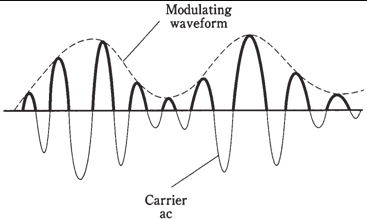

In [ ]:
for i in range(0, len(epochs[LEFT])):
    # Fill the blank

ld = []
rd = []
for i in range(0, len(epochs[LEFT])):
    ld.append(epochs[LEFT][i].get_data()[0])
    rd.append(epochs[RIGHT][i].get_data()[0])
data = [ld, rd]

In [ ]:
# abs
data = # Fill the blank

# mean
data = # Fill the blank

R = # Fill the blank
ERD = # Fill the blank

In [ ]:
# 예시 데이터 plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

axes[0].plot((np.arange(len(ERD[LEFT][C3])) - 512) / 512, ERD[LEFT][C3], label='C3')
axes[0].plot((np.arange(len(ERD[LEFT][C4])) - 512) / 512, ERD[LEFT][C4], label='C4')
axes[0].set_title("Left")
axes[0].set_xlabel("Times")
axes[0].set_ylabel("ERD%")
axes[0].legend()

axes[1].plot((np.arange(len(ERD[RIGHT][C3])) - 512) / 512, ERD[RIGHT][C3], label='C3')
axes[1].plot((np.arange(len(ERD[RIGHT][C4])) - 512) / 512, ERD[RIGHT][C4], label='C4')
axes[1].set_title("Right")
axes[1].set_xlabel("Times")
axes[1].set_ylabel("ERD%")
axes[1].legend()

axes[2].plot((np.arange(len(ERD[RIGHT][C3])) - 512) / 512, ERD[LEFT][C3] - ERD[RIGHT][C3], label='C3')
axes[2].plot((np.arange(len(ERD[RIGHT][C3])) - 512) / 512, ERD[LEFT][C4] - ERD[RIGHT][C4], label='C4')
axes[2].set_title("Left MI - Right MI")
axes[2].set_xlabel("Times")
axes[2].set_ylabel("ERD%")
axes[2].legend()

for ax in axes:
    ax.axvline(x=0, color='red', linestyle='--')

plt.show()